In [1]:
import torch.utils.data as td
import torchvision.utils as tvu
import sys
sys.path.append('..')
sys.path.append('..\..')

import data_sets as ds
import matplotlib.pyplot as plt


In [2]:
from skimage import io, morphology, filters
import numpy as np
from matplotlib import pyplot as plt, cm
plt.rcParams['image.cmap'] = 'gray' # set default colormap for imshow to be gray

<class 'numpy.uint8'>
im (mean, min, max): 110.44672288516068 0 255


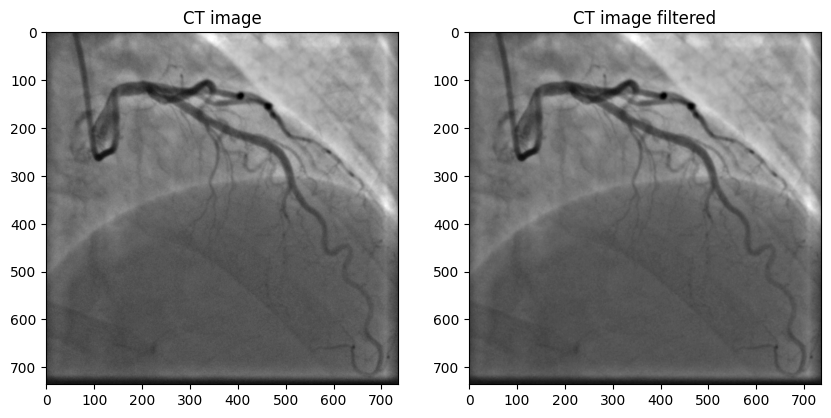

In [16]:
im = io.imread(r"C:\Users\jeppe\Desktop\Data\6\Orig\IMG00006_28.tiff")
lab = io.imread(r"C:\Users\jeppe\Desktop\Data\6\Annot\I6_028.tiff")
print(type(im[0,0]))
print("im (mean, min, max):", im.mean(), im.min(), im.max())

dskelm = morphology.disk(1)
imFilt = filters.median(im, dskelm)

fig, ax = plt.subplots(1,2, figsize=(10,5)) # figsize sets size in inches
ax[0].imshow(im)
ax[0].set_title('CT image')
ax[1].imshow(imFilt)
ax[1].set_title('CT image filtered')
plt.show()

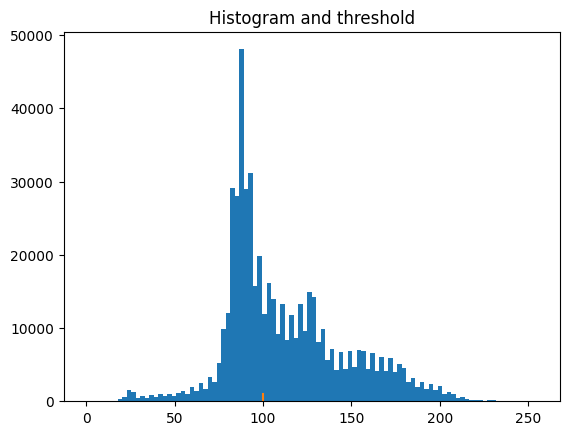

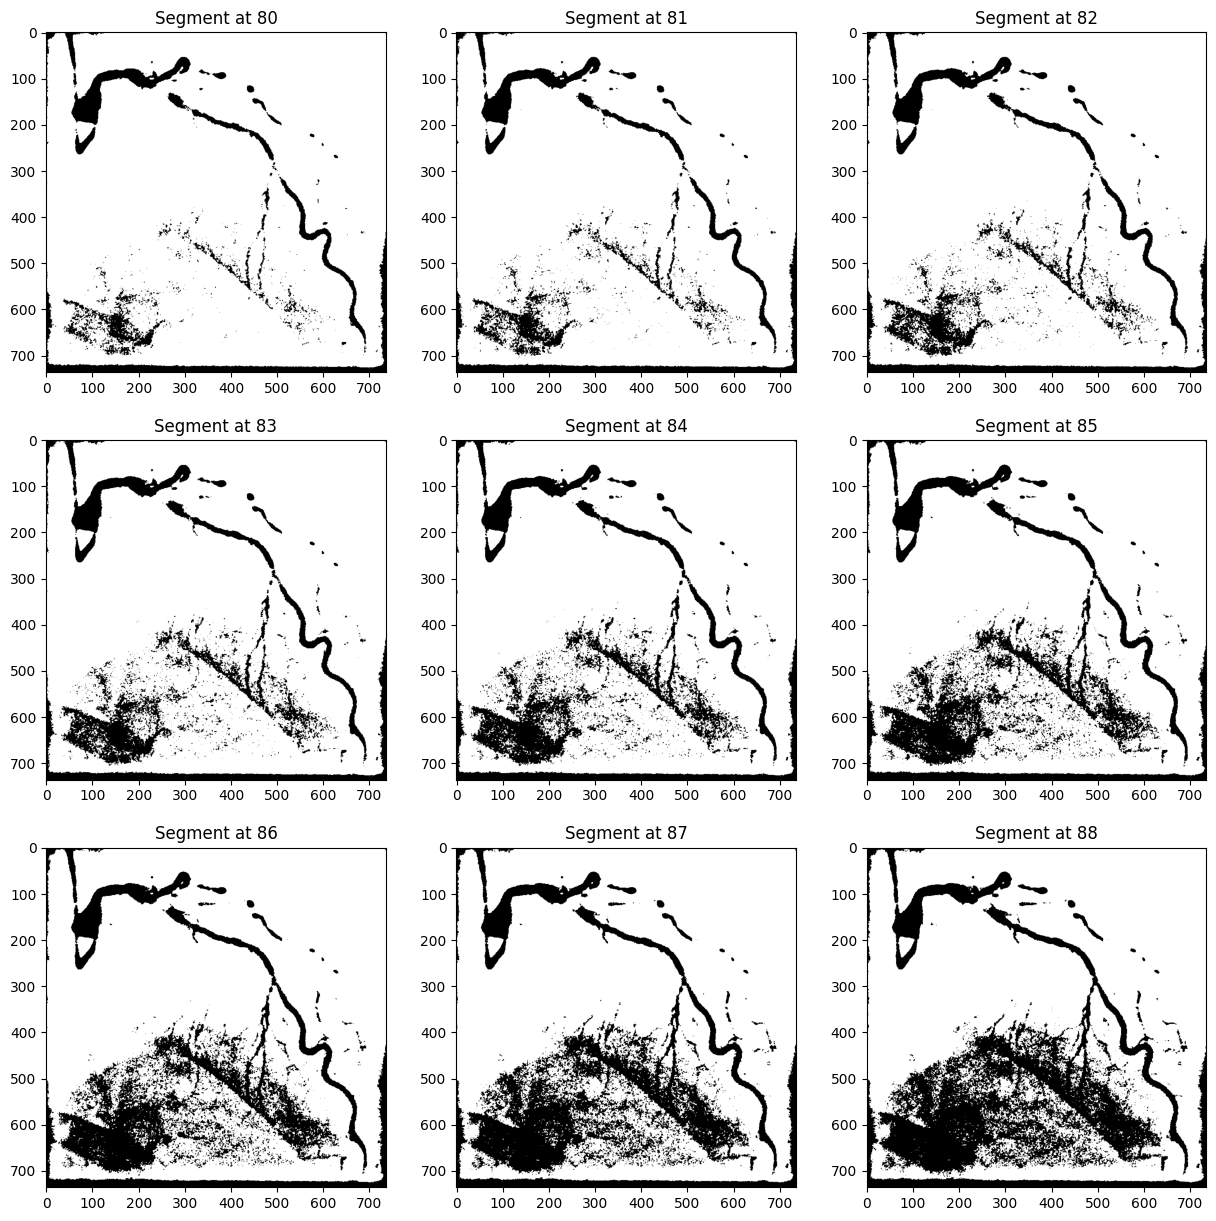

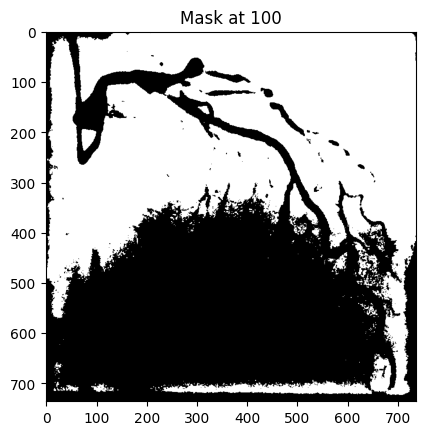

In [9]:
start_value = 80
step = 1
num_pics = 9
num_cols = 3
num_rows = num_pics//num_cols


plt.hist(imFilt.flatten(),100)
t = 100
plt.plot([t,t],[0,1000])
plt.title('Histogram and threshold')
plt.show()

lst = list(range(start_value,start_value+num_pics*step,step))
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15,15)) # figsize sets size in inches
for i in range(len(lst)):
    s = lst[i]
    brain = imFilt > s
    ax[i//num_cols,i%num_cols].imshow(brain)
    ax[i//num_cols,i%num_cols].set_title('Segment at '+str(s))
plt.show()

tBrain = 100
brain = imFilt > tBrain
plt.imshow(brain)
plt.title('Mask at ' + str(tBrain))
plt.show()

C:\Users\jeppe\AppData\Local\Temp\ipykernel_7260\4142339543.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coeff, residuals, rank, singularValues = np.linalg.lstsq(VanderMondeMsk, ValsMsk)


B (mean, min, max): 122.27262511295832 85.7081180473719 196.85066463389154


Text(0.5, 1.0, 'Bias field correted')

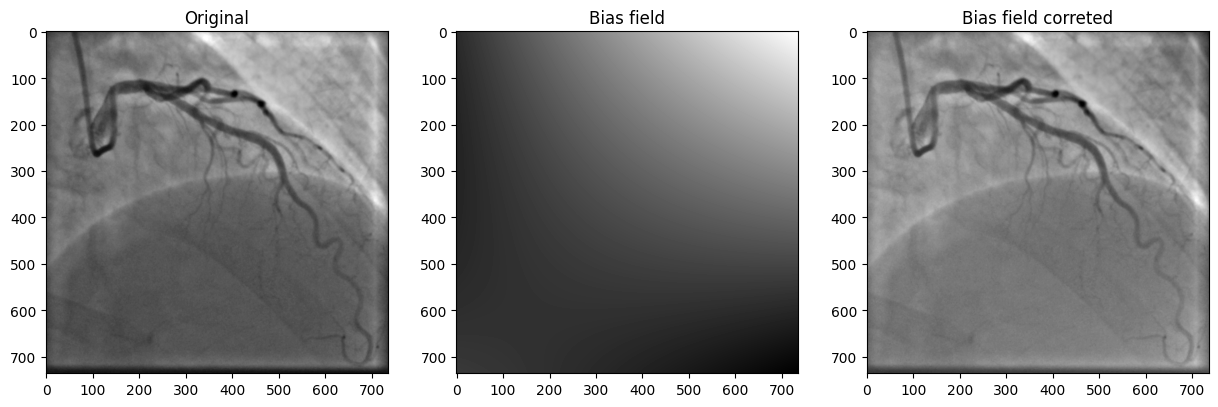

In [18]:
def biasField(I,mask):
    (rows,cols) = I.shape
    r, c = np.meshgrid(list(range(rows)), list(range(cols)))
    rMsk = r[mask].flatten()
    cMsk = c[mask].flatten()
    VanderMondeMsk = np.array([rMsk*0+1, rMsk, cMsk, rMsk**2, rMsk*cMsk, cMsk**2]).T
    ValsMsk = I[mask].flatten()
    coeff, residuals, rank, singularValues = np.linalg.lstsq(VanderMondeMsk, ValsMsk)
    VanderMonde = np.array([r*0+1, r, c, r**2, r*c, c**2]).T
    J = np.dot(VanderMonde, coeff) # @ operator is a python 3.5 feature!
    J = J.reshape((rows,cols)).T
    return(J)

B = biasField(imFilt, brain)
print("B (mean, min, max):", B.mean(), B.min(), B.max())
imBias = imFilt-B+B.mean()
fig, ax = plt.subplots(1, 3, figsize=(15,5)) # figsize sets size in inches
ax[0].imshow(imFilt)
ax[0].set_title('Original')
ax[1].imshow(B)
ax[1].set_title('Bias field')
ax[2].imshow(imBias)
ax[2].set_title('Bias field corrected')

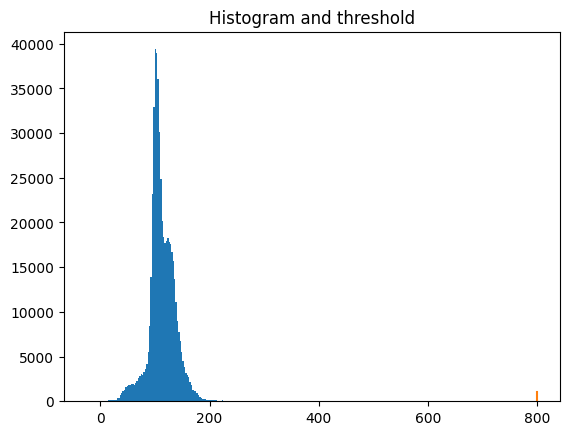

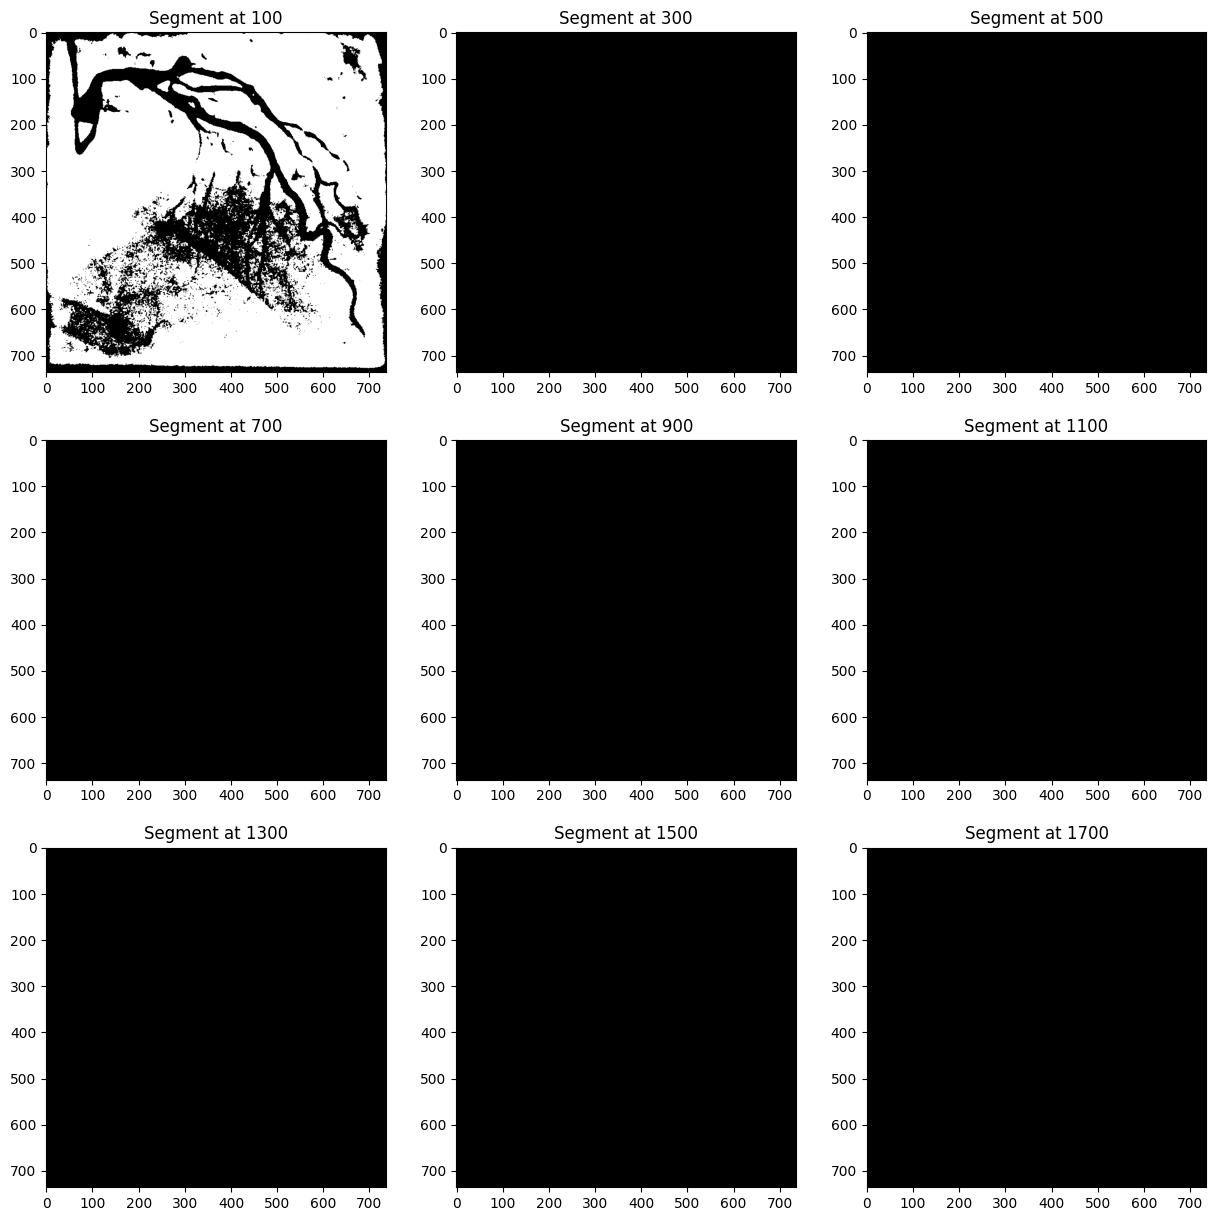

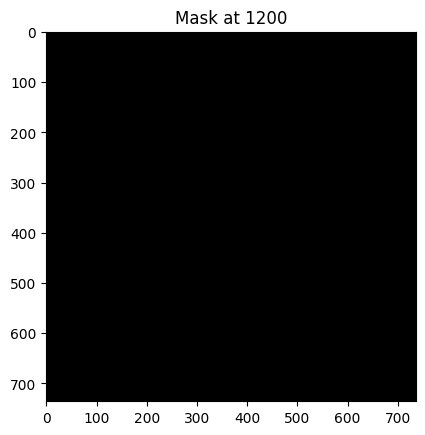

In [11]:
plt.hist(imBias.flatten(),100)
t = 800
plt.plot([t,t],[0,1000])
plt.title('Histogram and threshold')
plt.show()

step = 200
lst = list(range(100,100+9*step,step))
fig, ax = plt.subplots(3, 3, figsize=(15,15)) # figsize sets size in inches
for i in range(len(lst)):
    s = lst[i]
    brainBias = imBias > s
    ax[i//3,i%3].imshow(brainBias)
    ax[i//3,i%3].set_title('Segment at '+str(s))
plt.show()

tBrainBias = 1200
brainBias = imBias > tBrainBias
plt.imshow(brainBias)
plt.title('Mask at ' + str(tBrainBias))
plt.show()

Text(0.5, 1.0, 'Bias corrected segmented')

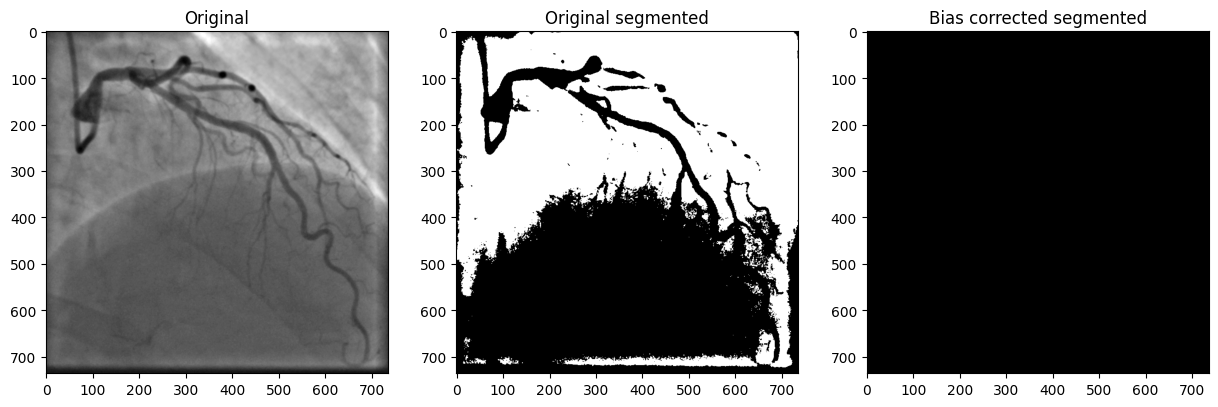

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15,5)) # figsize sets size in inches
ax[0].imshow(imFilt)
ax[0].set_title('Original')
ax[1].imshow(brain)
ax[1].set_title('Original segmented')
ax[2].imshow(brainBias)
ax[2].set_title('Bias corrected segmented')